# Laboratorio 4 - Parte 2

### Redes Neuronales Artificiales: RNN y SOM

### 2019-I

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [1]:
from __future__ import division
import numpy as np
import math
import matplotlib.pyplot as plt
#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")
%matplotlib inline

## Ejercicio 1

En este ejercicio vamos a utilizar dos bases de datos diferentes para entrenar dos mapas auto-organizables. En primer lugar usaremos la base de datos iris y posteriormente la base de datos de dígitos escritos.  Si bien en estas dos bases de datos las muestras cuentan con etiquetadas de salida, las vamos a usar para evaluar el agrupamiento que produce un SOM, es decir que no usaremos las etiquetas e intentaremos que el modelo descubra los grupos de muestras similares que hay en los datos. Tenga en cuenta el número de clases en cada una de las bases de datos para los análisis posteriores.

In [11]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
#Definimos una lista de colores de acuerdo con las clases originales
colors = ["red"] * 50
colors.extend(["white"] * 50)
colors.extend(["yellow"] * 50)

In [12]:
#! pip install somoclu

Para el trabajo usaremos el paquete somoclu (use la instrucción pip install sumoclu), los parámetros de la función los pueden consultar en : https://somoclu.readthedocs.io/en/stable/reference.html. 

Complete el siguiente código para entrenar un SOM con los datos almacenados en la variable Xn (Datos normalizados), use una cuadrícula de neuronas de 100 por 120 y un número de épocas igual a 100. Adicionalmente use las opciones maptype="toroid" y compactsupport=False, para una mejor visualización de los resultados.

In [19]:
from numpy import random
import somoclu
from sklearn.preprocessing import StandardScaler
random.seed(19680801)
scaler = StandardScaler()
Xn = scaler.fit_transform(X);
n_columns = 120
n_rows =100
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False , maptype='toroid')
som.train(data=Xn,epochs=100)

Una vez entrenado el modelo ejecute la siguiente celda, la cuál grafica la matriz U extraída del SOM:

/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:424: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_min = np.asscalar(a_min.astype(scaled_dtype))
/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:425: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_max = np.asscalar(a_max.astype(scaled_dtype))
/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:424: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_min = np.asscalar(a_min.astype(scaled_dtype))
/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:425: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_max = np.asscalar(a_max.astype(scaled_dtype))


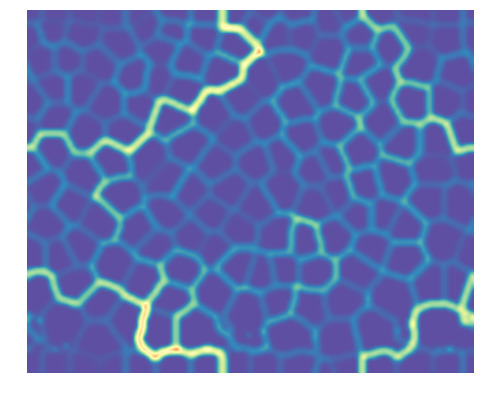

/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:424: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_min = np.asscalar(a_min.astype(scaled_dtype))
/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:425: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_max = np.asscalar(a_max.astype(scaled_dtype))
/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:424: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_min = np.asscalar(a_min.astype(scaled_dtype))
/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:425: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_max = np.asscalar(a_max.astype(scaled_dtype))


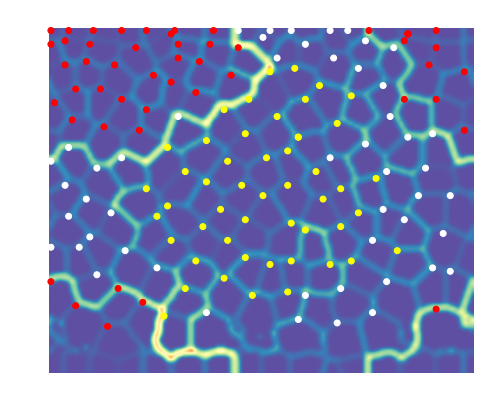

<module 'matplotlib.pyplot' from '/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [20]:
som.view_umatrix()
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

Responda:

1.1 ¿Qué es la matrix U (En inglés U-matrix) de un SOM?

**R//:** Es una representación de un mapa auto organizable donde se puede visualizar la distacia entre las neuronas. Donde una coloración oscura entre las neuronas corresponde a una gran distancia. Enseñar un SOM y representarlo con la matriz U ofrece una forma rápida de obtener información sobre la distribución de datos.

1.2 ¿Cómo se pueden interpretar las gráficas obtenidas en el punto anterior? Describa detalladamente lo que observa e interprételo de acuerdo con la definición que dio en el punto 1.1

**R//:** El grafica anterior se visualizan unas fronteras que separan notablemente los datos en varias regiones según los patrones encontrados en los datos por el SOM. esto se confirma con los colores de cada punto en el mapa ya que cada region separada cuenta con el mismo color.

Ejecute la siguiente instrucción:

/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:424: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_min = np.asscalar(a_min.astype(scaled_dtype))
/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:425: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_max = np.asscalar(a_max.astype(scaled_dtype))
/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:424: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_min = np.asscalar(a_min.astype(scaled_dtype))
/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:425: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_max = np.asscalar(a_max.astype(scaled_dtype))


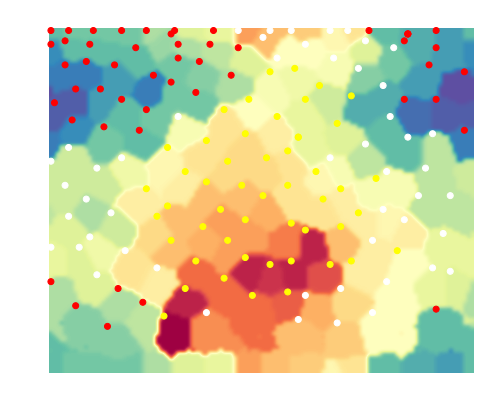

/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:424: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_min = np.asscalar(a_min.astype(scaled_dtype))
/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:425: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_max = np.asscalar(a_max.astype(scaled_dtype))
/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:424: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_min = np.asscalar(a_min.astype(scaled_dtype))
/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:425: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_max = np.asscalar(a_max.astype(scaled_dtype))


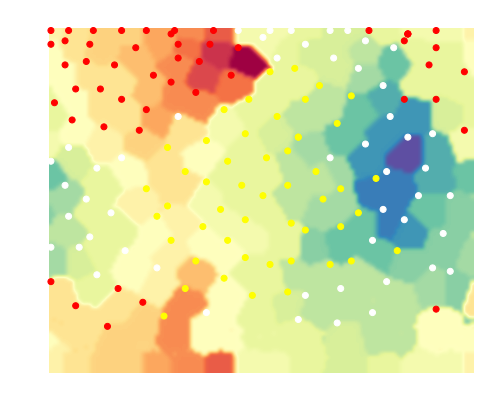

/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:424: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_min = np.asscalar(a_min.astype(scaled_dtype))
/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:425: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_max = np.asscalar(a_max.astype(scaled_dtype))
/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:424: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_min = np.asscalar(a_min.astype(scaled_dtype))
/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:425: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_max = np.asscalar(a_max.astype(scaled_dtype))


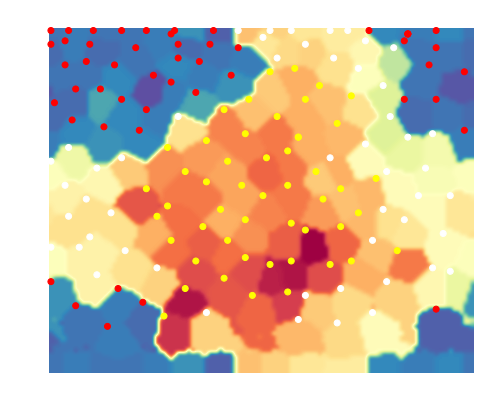

/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:424: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_min = np.asscalar(a_min.astype(scaled_dtype))
/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:425: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_max = np.asscalar(a_max.astype(scaled_dtype))
/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:424: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_min = np.asscalar(a_min.astype(scaled_dtype))
/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:425: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_max = np.asscalar(a_max.astype(scaled_dtype))


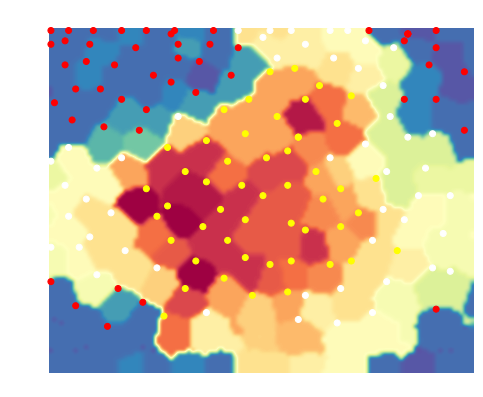

<module 'matplotlib.pyplot' from '/home/josearangos/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [21]:
som.view_component_planes(bestmatches=True,bestmatchcolors=colors)

Responda:


1.3 ¿Qué se está gráficando en las figuras? 

**R//:**la distribución relativa de los componentes de los datos de entrada; es decir, esto permite visualizar cómo se relacionan las características del modelo en la entrada.

1.4 ¿Qué utilidad tienen las gráficas anteriores?

**R//:**

1.5 ¿De acuerdo con las gráficas anteriores cuáles variables en el problema están correlacionadas?

**R//:** Las variables 3 y 4 se pueden ver que sus respectivos gráficos son muy similares.

## Ejercicio 2

Repita el proceso anterior para los datos del problema de reconocimiento de dígitos escritos a mano. Ejecute la siguiente celda para cargar los datos

In [53]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits(n_class=4)

#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

#---------- Datos a usar ----------------------
X = data
Y = digits.target

#Definimos una lista de colores de acuerdo con las clases en Y
color = []
for i in range(len(Y)):
    if Y[i] == 0:
        color.append('red')
    elif Y[i] == 1:
        color.append('blue')
    elif Y[i] == 2:
        color.append('green')
    elif Y[i] == 3:
        color.append('yellow')

Entrene un SOM a partir de los datos cargados en la celda anterior. En este caso utilice un SOM con una capa de neuronas de dimension 150 por 150.

In [ ]:
random.seed(19680801)
scaler = StandardScaler()
Xn = scaler.fit_transform(X);

som = ....

Una vez entrenado el SOM, ejecute la siguiente celda

In [ ]:
som.view_umatrix()
som.view_umatrix(bestmatches=True, bestmatchcolors=color)

Responda:

2.1 ¿Qué diferencia observa entre la matrix U en este caso vs el anterior?

2.2 ¿Qué puede concluir a partir de la gráfica que incluye la ubicación de las neuronas ganadoras para cada muestra de entrada?

## Ejercicio 3

En este ejercicio entrenaremos una Red Neuronal Recurrente para la predicción de una serie de tiempo. Este problema corresponde a una configuración many-to-many. En este caso usaremos una serie de tiempo que corresponde al número de pasajeros internacionales por mes, desde el año 1949 hasta el año 1960. La serie de tiempo puede ser consultada en: https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line 

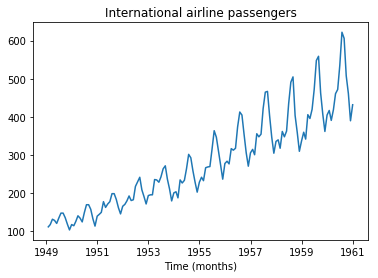

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('DB/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
#---- Tiempos para los datos originales---
date_begin = np.datetime64('1949-01')
date_end = np.datetime64('1961-01')
Time = pd.date_range(date_begin, date_end, freq='M')

plt.plot(Time,dataset)
plt.title('International airline passengers')
plt.xlabel('Time (months)')
plt.show()

El paquete que usaremos en este caso para el entrenamiento de redes neuronales recurrentes es neurolab (use la instrucción pip install neurolab), la documentación puede ser consultada en : https://pythonhosted.org/neurolab/.

In [86]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

#Mean Absolute Percentage Error para los problemas de regresión
def MAPE(Y_est,Y):
    N = np.size(Y)
    mape = np.sum(abs((Y_est.reshape(N,1) - Y.reshape(N,1))/Y.reshape(N,1)))/N
    return mape 

3.1 Complete el código siguiente y entrene una red neuronal recurrente de Elman, con una capa oculta y una capa de salida. Use función de activación tangente hiperbólica para la capa oculta y lineal para la capa de salida. Use un número de épocas igual a 1000, y un objetivo de error inferior a 0.00001. Inicialice los pesos de las capas aleatoriamente entre [-0.1, 0.1].

In [ ]:
import neurolab as nl
from sklearn.preprocessing import MinMaxScaler
random.seed(19680801)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t-look_back+1:t and Y=t+1
look_back = 1 # Retardos de tiempo por muestra
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#Esta variable se requiere para definir la red de acuerdo con la librería neurolab. Define el número de entradas y el rango de valores que toma cada entrada
layers = []
for i in range(look_back):
    layers.append([0, 1])

# Crear la red e inicializar los pesos. 
net = ....

# Entrenar la red con los datos de entrenamiento

# Evaluar la red con los datos de test
output = ...

# Calculo de error
Error = MAPE(output,testY)

print('MAPE = ' + str(np.mean(Error)))

3.1 Haga una gráfica de la salida real vs la mejor predicción hecha por la red. Recuerde incluir los tiempos apropiados en el eje x y usar el método plt.legend() para identificar cuál es la serie real y cual la predicción.

In [ ]:
# Gráfica
plt....

3.2 Una vez compoletado el código realice los experimentos necesarios para llenar la siguiente tabla: 

In [122]:
import pandas as pd
import qgrid
df_types = pd.DataFrame({
    'Retardos de tiempo por muestra' : pd.Series([1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4]),
    'Neuronas por capa' : pd.Series([5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30])})
df_types["MAPE"] = ""
df_types.set_index(['Retardos de tiempo por muestra','Neuronas por capa'], inplace=True)
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

UWdyaWRXaWRnZXQoZ3JpZF9vcHRpb25zPXsnaGlnaGxpZ2h0U2VsZWN0ZWRSb3cnOiBUcnVlLCAnZnVsbFdpZHRoUm93cyc6IFRydWUsICdyb3dIZWlnaHQnOiAyOCwgJ2VuYWJsZUNvbHVtblLigKY=


Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [124]:
qgrid_widget.get_changed_df()

MAPE
Retardos de tiempo por muestra Neuronas por capa             
1                              5                  0.124732765
                               10                            
                               15                            
                               20                            
                               25                            
                               30                            
2                              5                             
                               10                            
                               15                            
                               20                            
                               25                            
                               30                            
3                              5                             
                               10                            
                               15                            
                               20                            
                               25                            
                               30                            
4                              5                             
                               10                            
                               15                            
                               20                            
                               25                            
                               30

Responda:

3.3 ¿Cuál fue la mejor configuración encontrada?

3.4 ¿Porqué seguir aumentando los tiempos de retardo no implica siempre una mejora en la predicción del modelo?

## *Ejercicio 4

Este ejercicio es opcional. Use una red neuronal tipo MLP para reolver el mismo problema de predicción del número de pasajeros y compare el resultado con el obtenido usando la red recurrente.